# Миронова Елена, РИМ-181226
# Сверточные фильтры
## 1. Edge detection (выделение границ)
### 1.1. Стандартный фильтр для выделения скачков яркости
Стандартный фильтр для выделения скачков яркости (выделения границ, edge
detection) использует разностную аппроксимацию первых производных к яркости исходного
изображения и использует следующие матрицы в качестве ядра свертки:

In [1]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb
from skimage import img_as_float, img_as_ubyte
from skimage import filters
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data
%matplotlib inline

C:\Users\elenamir\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\elenamir\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


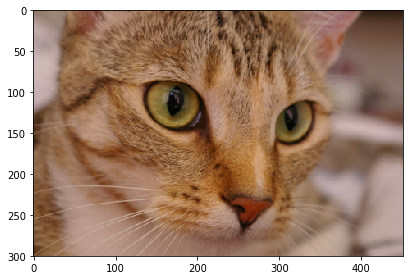

In [2]:
img = data.chelsea()
imshow(img)
plt.show()

In [3]:
img2 = rgb2gray(img)

In [4]:
kernel_Dx = np.array([[0, 0, 0], 
                     [-1, 0, 1], 
                     [0, 0, 0]])

kernel_Dy = np.array([[0, 1, 0], 
                     [0, 0, 0], 
                     [0, -1, 0]])

In [5]:
res_Dx = convolve2d(img2, kernel_Dx, mode = "valid")
res_Dy = convolve2d(img2, kernel_Dy, mode = "valid")

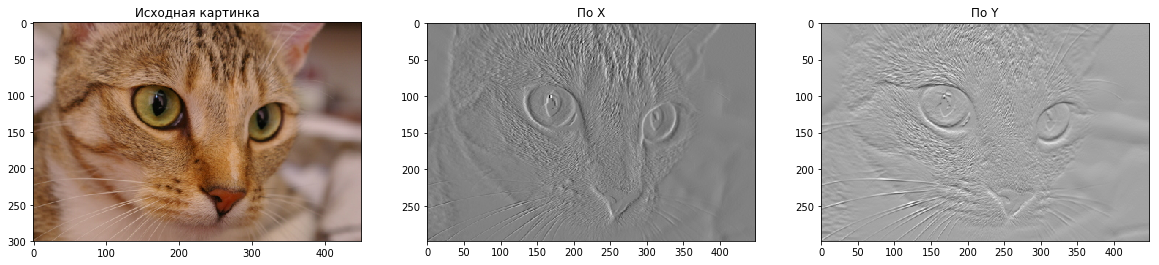

In [6]:
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,3,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.set_cmap(cmap="gray")
plt.subplot(1,3,2)
plt.title("По X")
plt.imshow(res_Dx)
plt.subplot(1,3,3)
plt.title("По Y")
plt.imshow(res_Dy)

### 1.2. Фильтр Превитта
Чуть более сложным является фильтр Превитта, использующий следующие
матрицы в качестве ядра свертки:

In [7]:
kernel_Px = np.array([[-1, 0, 1], 
                     [-1, 0, 1], 
                     [-1, 0, 1]])

kernel_Py = np.array([[-1, -1, -1], 
                     [0, 0, 0], 
                     [1, 1, 1]])

In [8]:
res_Px = convolve2d(img2, kernel_Px, mode = "valid")
res_Py = convolve2d(img2, kernel_Py, mode = "valid")

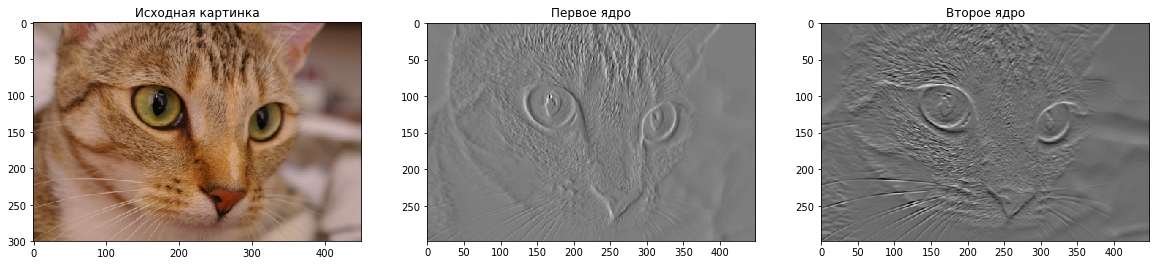

In [9]:
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,3,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.set_cmap(cmap="gray")
plt.subplot(1,3,2)
plt.title("Первое ядро")
plt.imshow(res_Px)
plt.subplot(1,3,3)
plt.title("Второе ядро")
plt.imshow(res_Py)

### 1.3. Фильтр Собеля

In [10]:
#1ый вариант
kernel_Sx = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])
#2ый вариант
kernel_Sy = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])
res_Sx = convolve2d(img2, kernel_Sx, mode = "valid")
res_Sy = convolve2d(img2, kernel_Sy, mode = "valid")


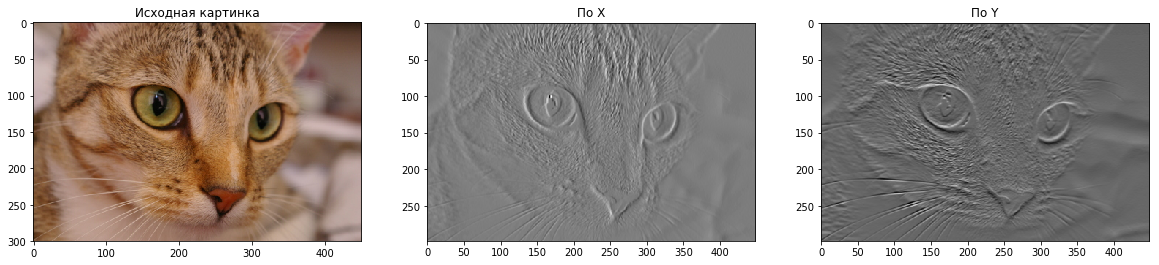

In [11]:
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,3,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.set_cmap(cmap="gray")
plt.subplot(1,3,2)
plt.title("По X")
plt.imshow(res_Sx)
plt.subplot(1,3,3)
plt.title("По Y")
plt.imshow(res_Sy)

### 1.4. Discrete Laplace operator
Разностный аналог лапласиана.

In [12]:
kernel_L1 = np.array([[0, 1, 0], 
                     [1, -4, 1], 
                     [0, 1, 0]])

kernel_L2 = np.array([[1, 1, 1], 
                     [1, -8, 1], 
                     [1, 1, 1]])

In [13]:
res_L1 = convolve2d(img2, kernel_L1, mode = "valid")
res_L2 = convolve2d(img2, kernel_L2, mode = "valid")

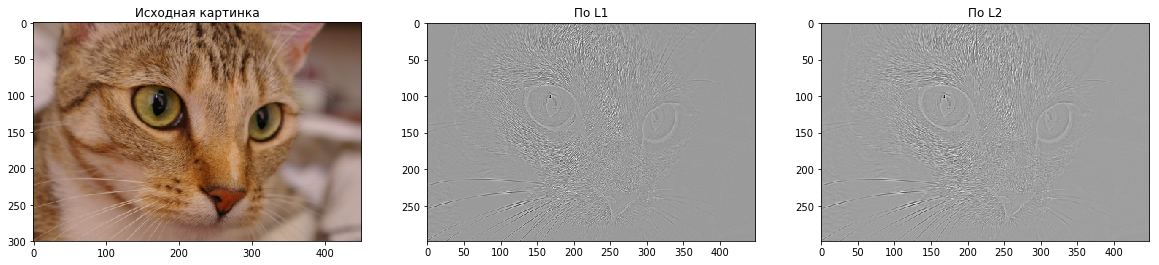

In [14]:
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,3,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.set_cmap(cmap="gray")
plt.subplot(1,3,2)
plt.title("По L1")
plt.imshow(res_L1)
plt.subplot(1,3,3)
plt.title("По L2")
plt.imshow(res_L2)

### 2.1 Фильтр тиснения

In [15]:
kernel_E1 = np.array([[0, 1, 0], 
                     [1, 0, -1], 
                     [0, -1, 0]])

In [16]:
res_E1 = convolve2d(img2, kernel_E1, mode = "valid")


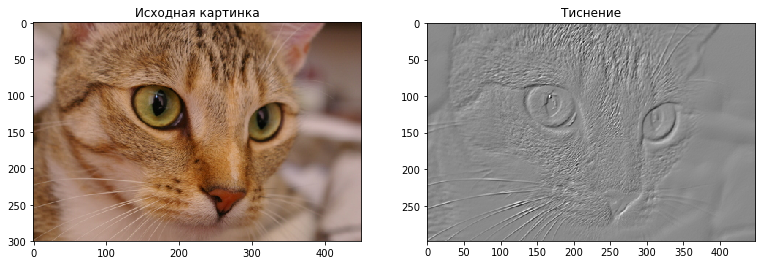

In [17]:
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,3,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.set_cmap(cmap="gray")
plt.subplot(1,3,2)
plt.title("Тиснение")
plt.imshow(res_E1)

### 2.2 Фильтр повышения контрастности

In [18]:
kernel_KK1 = np.array([[-1, -1, -1], 
                     [-1, 9, -1], 
                     [-1, -1, -1]])

In [19]:
res_KK1 = convolve2d(img2, kernel_KK1, mode = "valid")

In [20]:
def high_contrast(img):
    img = rgb2yuv(img)
    Y = img[:,:,0]
    U = img[:,:,1]
    V = img[:,:,2]
    
    Y = convolve2d(Y, kernel_KK1, mode = "same") # переполнение
    U = convolve2d(U, kernel_KK1, mode = "same")
    V = convolve2d(V, kernel_KK1, mode = "same")
    img = np.dstack((Y,U,V))
    img = yuv2rgb(img) # переполнение
    img = np.clip(img, 0, 1)
    return img

In [21]:
res1 = high_contrast(img)

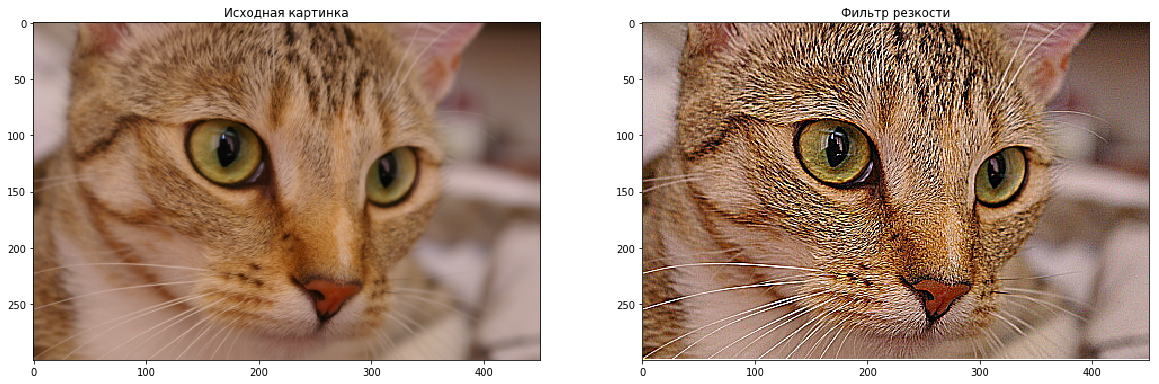

In [22]:
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,2,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Фильтр резкости")
plt.imshow(res1)

### По большей части это фильтр резкости. При использовании алгоритма увеличения резкости подчеркиваются различия между цветами смежных пикселей и выделяются незаметные детали. В ядре резкости центральный коэффициент больше 1, а окружен он отрицательными числами, сумма которых на единицу меньше центрального коэффициента. Таким образом, увеличивается любой существующий контраст между цветом пикселя и цветами его соседей. 

## 2.3 Выделение контуров изображений
### 2.3.1 Робертс

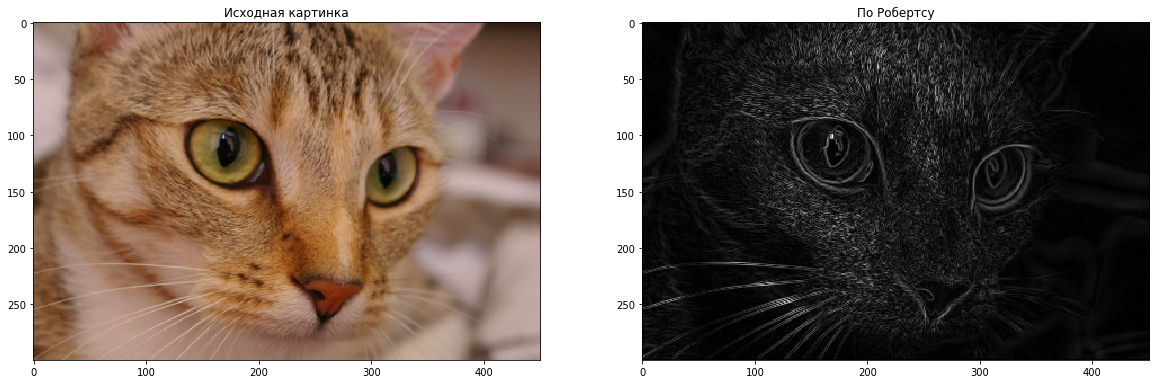

In [23]:
res_SR = filters.roberts(img2) # Find the edge magnitude using Roberts’ cross operator.
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,2,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("По Робертсу")
plt.imshow(res_SR)

### 2.3.2 Собель

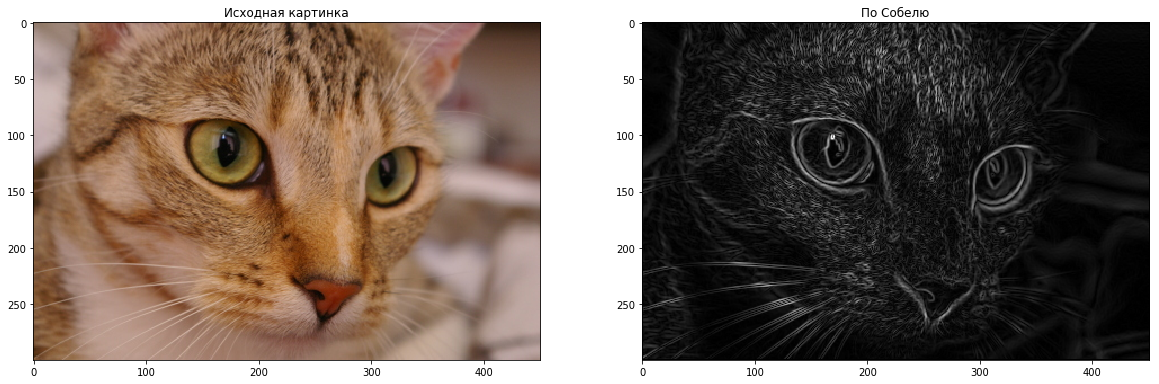

In [24]:
res_Sob = filters.sobel(img2) # Find the edge magnitude using Roberts’ cross operator.
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,2,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("По Собелю")
plt.imshow(res_Sob)

### 2.3.3 Шарр

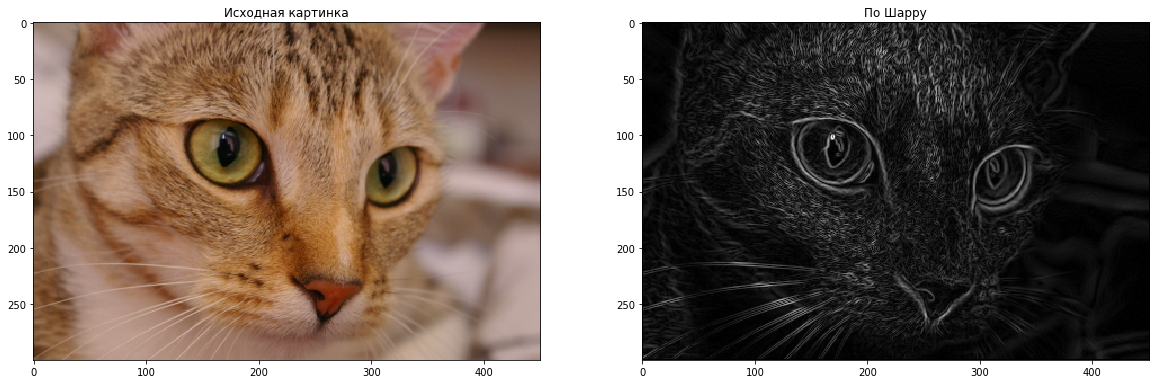

In [25]:
res_Schar = filters.scharr(img2) # Find the edge magnitude using Roberts’ cross operator.
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,2,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("По Шарру")
plt.imshow(res_Schar)

### 2.3.4 Превитт

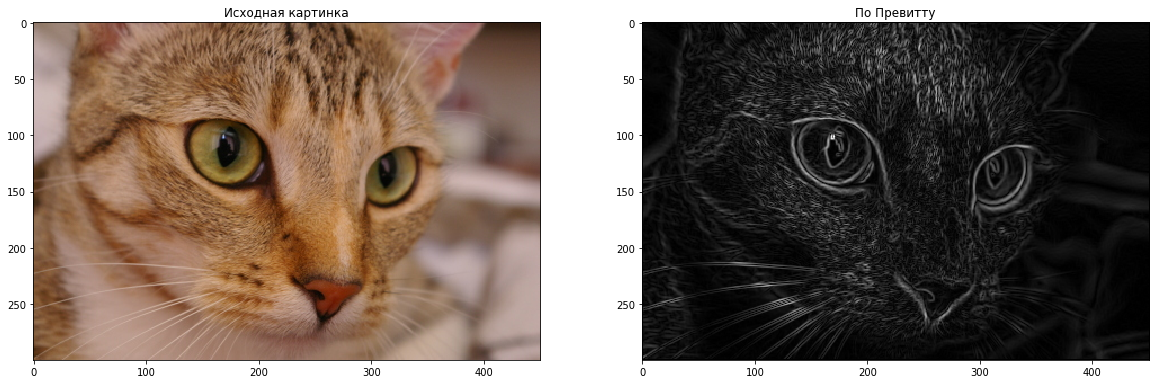

In [26]:
res_Prewitt = filters.prewitt(img2) # Find the edge magnitude using Roberts’ cross operator.
plt.figure(figsize=(20,10))
#источник
plt.subplot(1,2,1)
plt.title("Исходная картинка")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("По Превитту")
plt.imshow(res_Prewitt)